<h1>Mall Customer Segmentation</h1>
Datasets from Kaggle <a href="https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python">Mall Customer Segmentation Data</a>
<h3>Project description</h3>
<p>&emsp;&emsp;&emsp;lorerm50</b>.</p>
Author: <a href="www.linkedin.com/in/chanut-sunatho-5a3897271">Chanut Sunatho</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./data/customer_segmentation.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


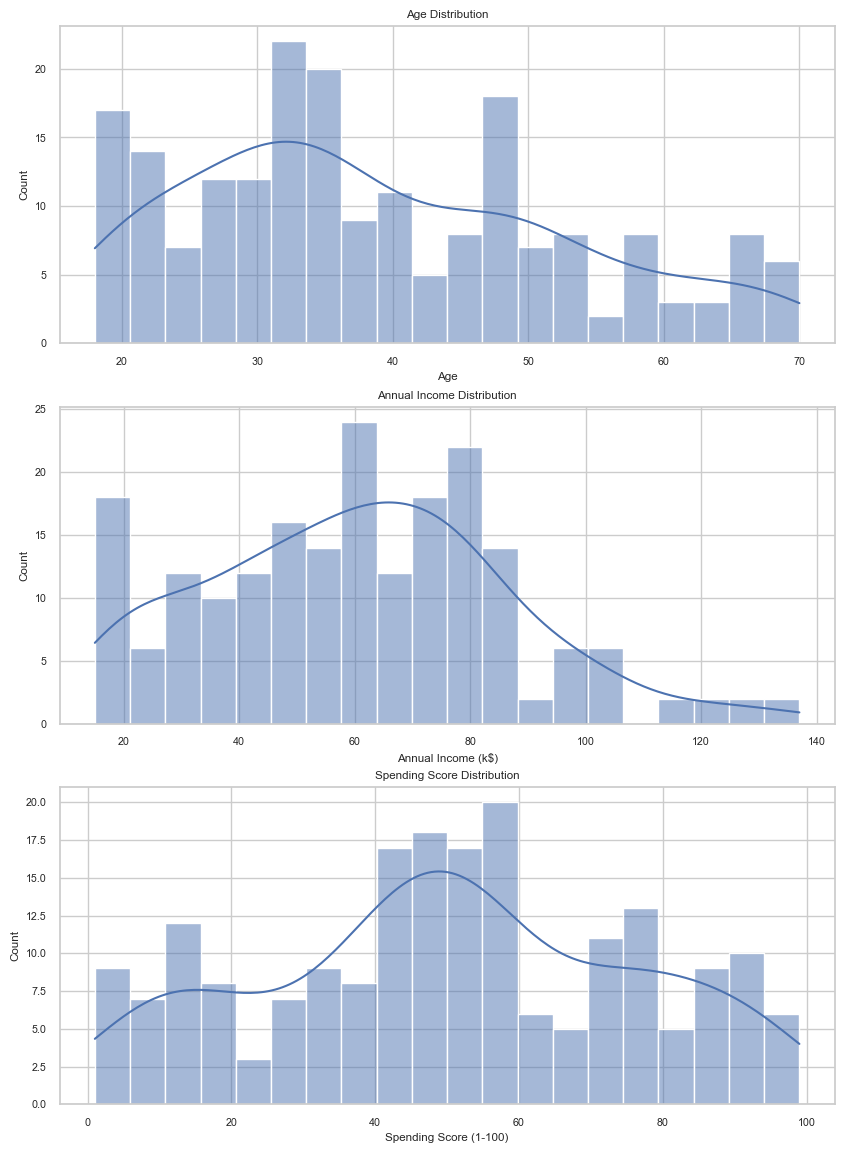

In [16]:
sns.set_theme(style="whitegrid", font_scale=0.7)
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

freq = 20

axes[0].title.set_text("Age Distribution")
sns.histplot(df["Age"], ax=axes[0], kde=True, bins=freq)

axes[1].title.set_text("Annual Income Distribution")
sns.histplot(df["Annual Income (k$)"], ax=axes[1], kde=True, bins=freq)

axes[2].title.set_text("Spending Score Distribution")
sns.histplot(df["Spending Score (1-100)"], ax=axes[2], kde=True, bins=freq)

plt.show()

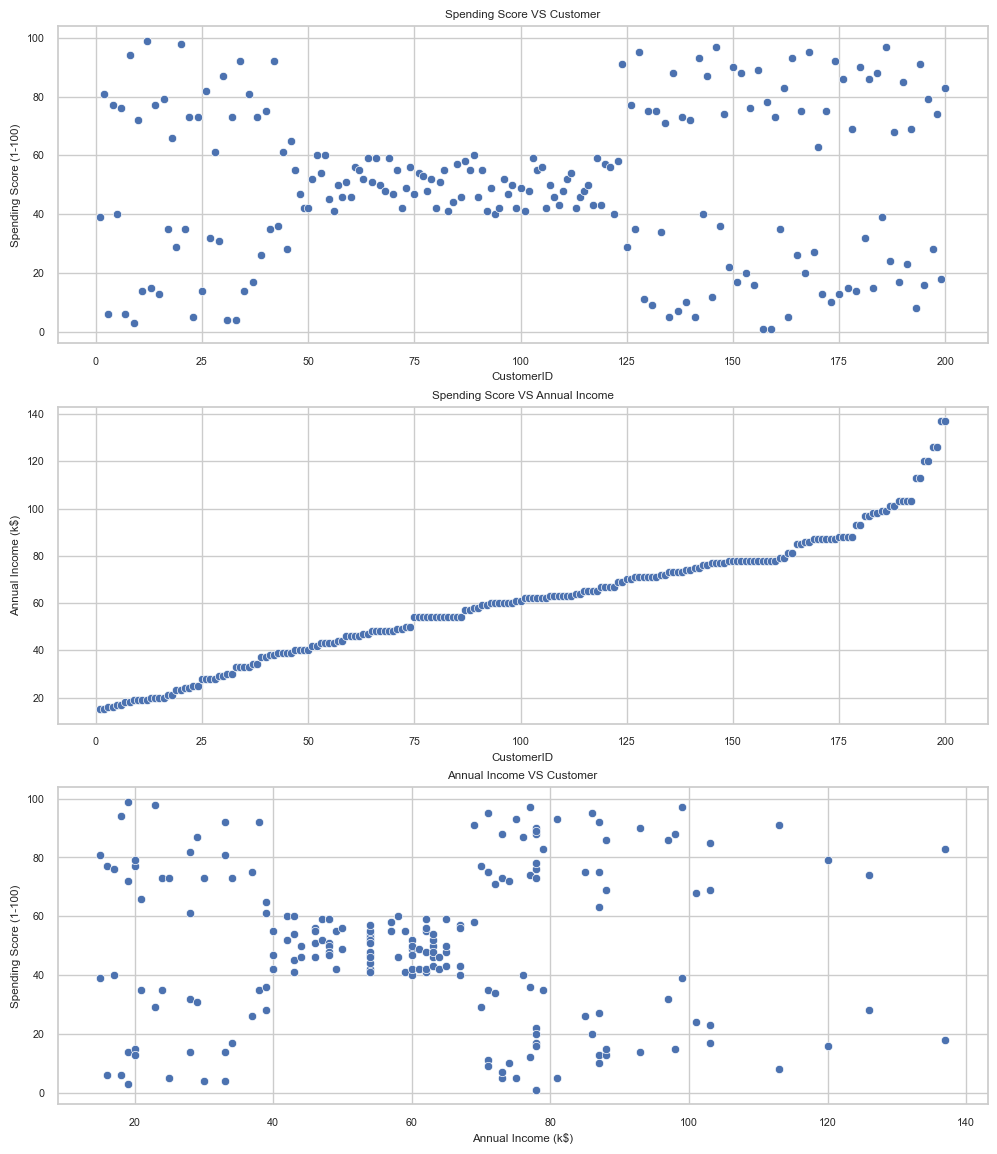

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

axes[0].title.set_text("Spending Score VS Customer")
sns.scatterplot(y="Spending Score (1-100)", x="CustomerID", data=df, ax=axes[0])

axes[1].title.set_text("Spending Score VS Annual Income")
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=df, ax=axes[2])

axes[2].title.set_text("Annual Income VS Customer")
sns.scatterplot(y="Annual Income (k$)", x="CustomerID", data=df, ax=axes[1])

plt.show()

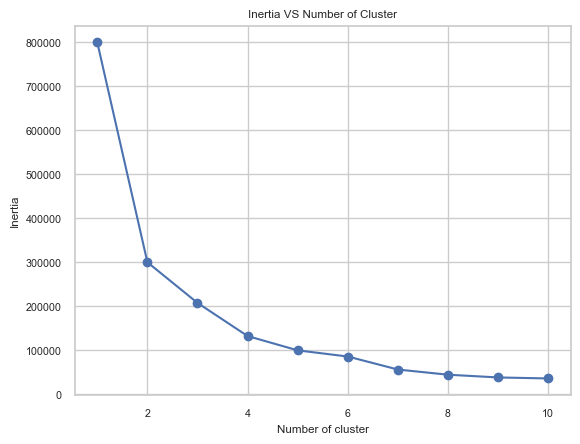

In [32]:
from sklearn.cluster import KMeans

data = df[["CustomerID", "Spending Score (1-100)"]]

# Elbow method
inertias= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.title("Inertia VS Number of Cluster")
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

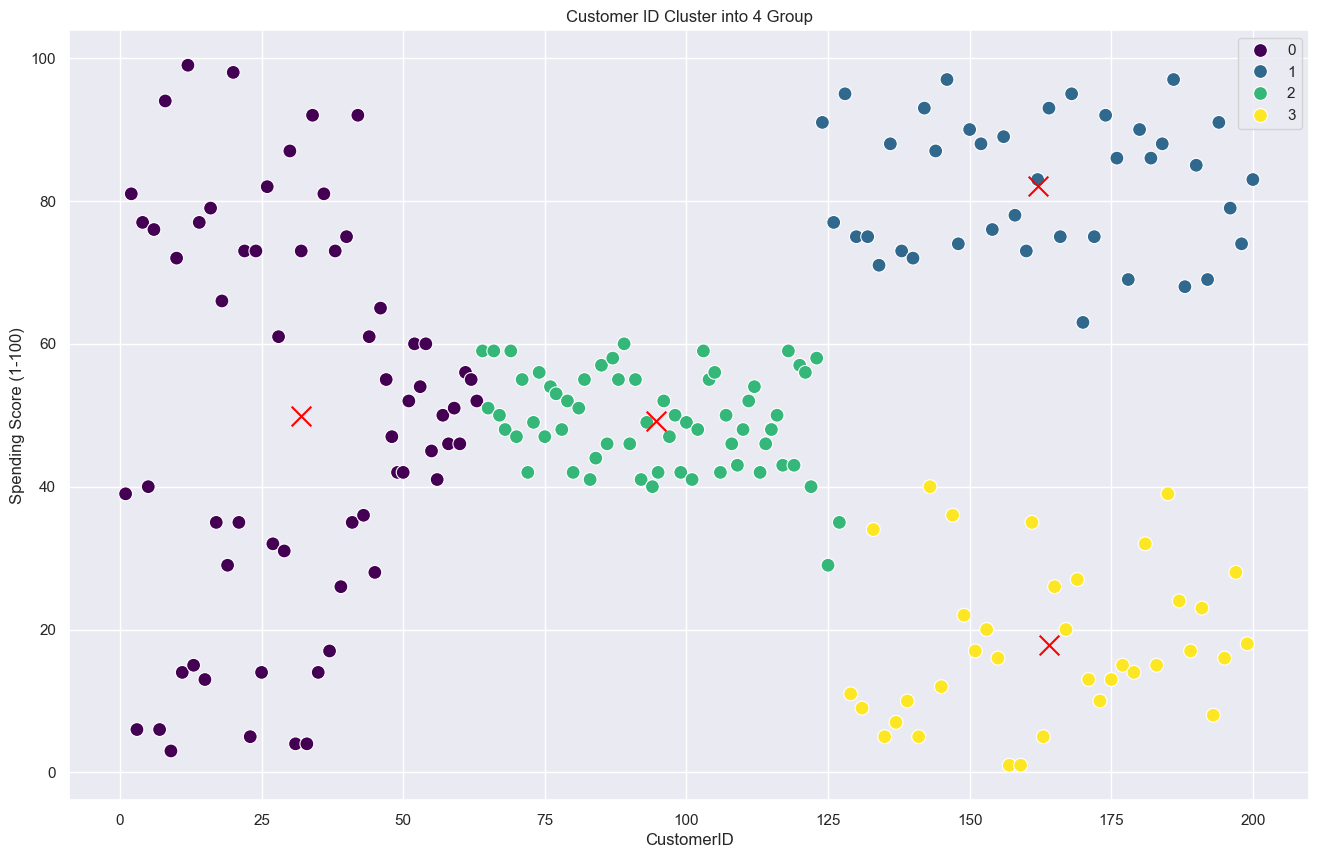

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

classes = kmeans.labels_

sns.set_theme(font_scale=1)
plt.figure(figsize=(16, 10))
plt.title("Customer ID Cluster into 4 Group")
sns.scatterplot(data=data, x="CustomerID", y="Spending Score (1-100)", hue=classes, palette="viridis", s=100)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red", marker='x', s=200, label="Cluster Centers"
)
plt.show()

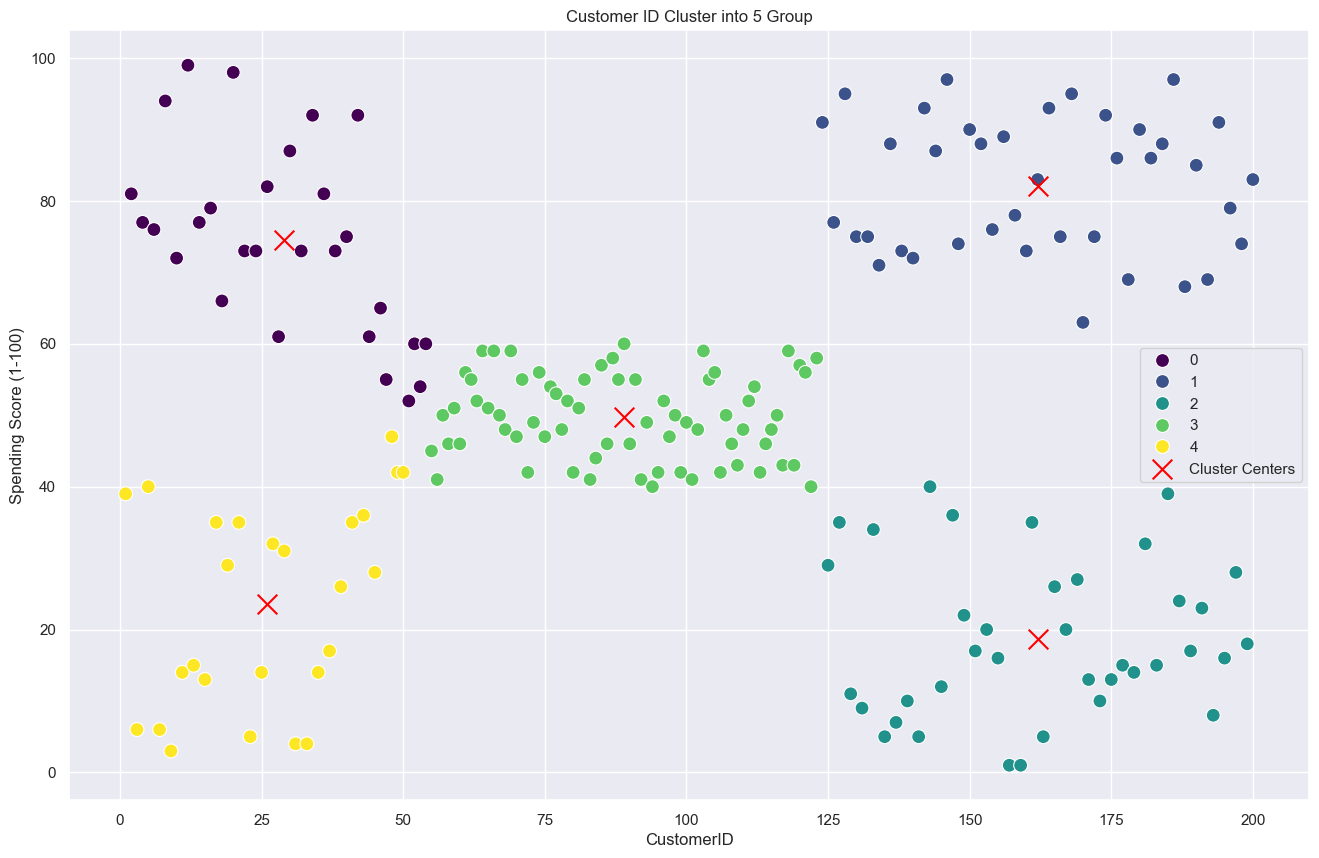

In [55]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

classes = kmeans.labels_

sns.set_theme(font_scale=1)
plt.figure(figsize=(16, 10))
plt.title("Customer ID Cluster into 5 Group")
sns.scatterplot(data=data, x="CustomerID", y="Spending Score (1-100)", hue=classes, palette="viridis", s=100)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red", marker='x', s=200, label="Cluster Centers"
)

plt.legend()
plt.show()